<a href="https://colab.research.google.com/github/FarazSheikh16/Babar_Azam_Stats_Analysis/blob/main/Babar_Azam_Stat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I installed some libraries from where I can access data related to cricket.

In [ ]:
!pip install cricpy
!pip install yorkpy

Now I imported all required Liraries in the below cell


In [17]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cricpy.analytics as ca
import yorkpy

Here I'm importing Babar Azam's ODI stats from espncricinfo

In [18]:
Babar_Azam = ca.getPlayerDataOD(348144,dir=".",file="Babar.csv", type = "batting" , homeOrAway = [1,2,3], result = [1,2,3,5])


Now Storing stats in a data frame and renaming its first column as Match No

In [19]:
Babar_df = pd.read_csv("Babar.csv")
Babar_df.rename(columns = {'Unnamed: 0':'Match No'}, inplace = True)
Babar_df

,Match No,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,54,78,60,4,0,90.00,4,bowled,1,v Zimbabwe,Lahore,31 May 2015
1,1,25,48,30,3,0,83.33,4,lbw,2,v Sri Lanka,Dambulla,11 Jul 2015
2,2,12,23,19,1,0,63.15,4,bowled,1,v Sri Lanka,Pallekele,15 Jul 2015
3,3,62*,79,62,2,4,100.00,6,not out,2,v England,Abu Dhabi,11 Nov 2015
4,4,4,8,6,0,0,66.66,2,lbw,2,v England,Abu Dhabi,13 Nov 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,49,66,46,3,1,106.52,3,caught,2,v New Zealand,Rawalpindi,27 Apr 2023
96,96,65,84,66,5,1,98.48,3,caught,2,v New Zealand,Rawalpindi,29 Apr 2023
97,97,54,85,62,3,1,87.09,3,bowled,1,v New Zealand,Karachi,3 May 2023
98,98,107,190,117,10,0,91.45,3,caught,1,v New Zealand,Karachi,5 May 2023


While doing stats analysis of batting of a player we don't consider matches where he didn't bat . So, exluding all the matches where he didn't bat.
After that I removed the 'v' , '*' from the Opposition and Runs columns respectively, for a better visualization and also changed the type of required columns to numeric.  

In [20]:
Babar_df['Opposition'] = Babar_df["Opposition"].str[1:]
Babar_df = Babar_df[Babar_df["Runs"] != "DNB"]
Babar_df['Runs']=Babar_df['Runs'].str.replace("*","")
Babar_df

<ipython-input-20-28e72d074f99>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-20-28e72d074f99>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Match No,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,0,54,78,60,4,0,90.00,4,bowled,1,Zimbabwe,Lahore,31 May 2015
1,1,25,48,30,3,0,83.33,4,lbw,2,Sri Lanka,Dambulla,11 Jul 2015
2,2,12,23,19,1,0,63.15,4,bowled,1,Sri Lanka,Pallekele,15 Jul 2015
3,3,62,79,62,2,4,100.00,6,not out,2,England,Abu Dhabi,11 Nov 2015
4,4,4,8,6,0,0,66.66,2,lbw,2,England,Abu Dhabi,13 Nov 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,49,66,46,3,1,106.52,3,caught,2,New Zealand,Rawalpindi,27 Apr 2023
96,96,65,84,66,5,1,98.48,3,caught,2,New Zealand,Rawalpindi,29 Apr 2023
97,97,54,85,62,3,1,87.09,3,bowled,1,New Zealand,Karachi,3 May 2023
98,98,107,190,117,10,0,91.45,3,caught,1,New Zealand,Karachi,5 May 2023


In [21]:
Babar_df[['Runs','BF','Match No','SR']] = Babar_df[['Runs','BF','Match No','SR']].apply(pd.to_numeric)
Babar_df['Runs']

<ipython-input-21-021d8497f04b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      54
1      25
2      12
3      62
4       4
     ... 
95     49
96     65
97     54
98    107
99      1
Name: Runs, Length: 98, dtype: int64

In [22]:
RunsperOpp = Babar_df.copy()
RunsperOpp = RunsperOpp.sort_values(['Inns'])

In [24]:
fig = px.bar(RunsperOpp, x="Opposition", y="Runs", color="Inns",
             color_discrete_map={1: "rgba(31, 119, 180, 0.8)", 2: "rgba(255, 127, 14, 0.8)"})

fig.update_layout(
    title={
        'text': "Babar Azam's ODI Runs Against All Teams",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_family="Arial",
    title_font_size=24,
    title_font_color="navy",
    font_family="Arial",
    font_color="black",
    xaxis=dict(title='Opposition'),
    yaxis=dict(title='Runs'),
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Customize tooltip information
fig.update_traces(hovertemplate='Opposition: %{x}<br>Runs: %{y}<br>Innings: %{customdata}')
fig.update_layout(legend_title_text='')

fig.show()


In [25]:
def Avg_Finder(opp):
  Total_inings = opp['Runs'].count()
  Not_outs = len(opp[opp['Dismissal'] == 'not out'])
  Total_runs = opp['Runs'].sum()
  return (Total_runs/(Total_inings-Not_outs))

In [26]:
Average_df = pd.DataFrame(Babar_df.groupby(['Opposition']).apply(Avg_Finder))
Average_df.columns=['Average']
Average_df = Average_df.sort_values('Average').reset_index()

In [27]:
Average_df

,Opposition,Average
0,Ireland,29.000000
1,India,31.600000
2,Hong Kong,33.000000
3,New Zealand,46.666667
4,England,48.000000
5,Bangladesh,48.500000
6,Afghanistan,55.500000
7,Sri Lanka,62.000000
8,South Africa,65.375000
9,Australia,73.500000


In [28]:
fig = px.scatter(Average_df, x="Opposition", y="Average", color = "Opposition" ,
                 size='Average', size_max=30,
                 color_continuous_scale = "Aggrnyl_r",
              )
fig.update_layout(
    title= {
        'text' : "Babar Azam\'s ODI Batting Average Against Each Team",
             'y':0.88,
            'x':0.5,
            'xanchor':'center' ,
            'yanchor':'top'},
            #showlegend=False,
            title_font_family = "Times New Roman",
            title_font_color="Green",
            font_family="Courier New",
            font_color = "Black"
)
fig.show()

In [29]:
CS = Babar_df.copy()
CS['Cummulative SR'] = CS['SR'].expanding().mean()


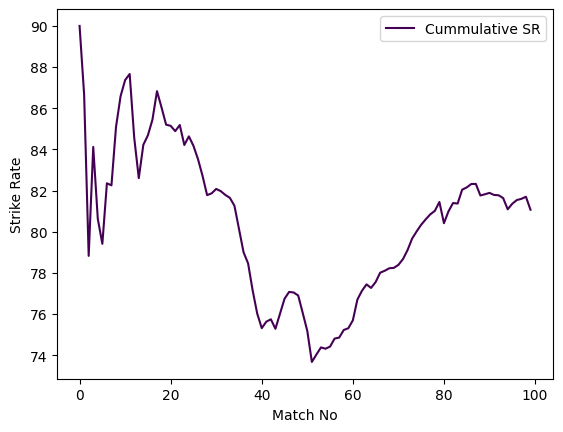

In [30]:
CS.plot( x = "Match No" ,
              y = 'Cummulative SR',
              kind = "line",
              ylabel = "Strike Rate",
              colormap = "viridis"
             )
plt.show()

In [31]:
Dismissals = pd.DataFrame(Babar_df['Dismissal'].groupby(Babar_df['Dismissal']).count())
Dismissals.columns = ['No of Dismissals']
Dismissals = Dismissals.reset_index()

In [32]:
Dismissals = Dismissals[Dismissals['Dismissal'] != 'not out']
Dismissals

,Dismissal,No of Dismissals
0,bowled,14
1,caught,54
2,lbw,11
4,run out,3
5,stumped,4


In [33]:
fig = px.pie(Dismissals, names="Dismissal", values="No of Dismissals", title = "Babar Azam Dismissals",color= "Dismissal" , color_discrete_map ={'bowled':'lightcyan',
                                 'caught':'cyan',
                                 'lbw':'royalblue',
                                 'run out': 'oceanblue',
                                 'stumped':'teal'}  )
fig.update_traces(textposition="outside", textinfo = "percent+label")
fig.show()